# ¡Hola Marcelo! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-danger">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Marcelo, he observado que has iniciado el proyecto realizando el análisis exploratorio de datos, lo cual es un buen primer paso para comprender la información con la que estás trabajando. Sin embargo, es importante que completes el desarrollo de la clasificación de reseñas y todas las actividades propuestas para poder aprobar el proyecto. Entiendo que pueden surgir dudas o dificultades en el proceso, por lo que te sugiero considerar la opción de solicitar una mentoría que podría ayudarte a aclarar conceptos y guiarte en el desarrollo completo del trabajo. Te animo a seguir adelante y dedicar tiempo a completar todas las actividades pendientes, sé que tienes la capacidad para lograrlo. Estaré atento a tu próxima iteración 👀

</div>

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Marcelo has hecho un gran trabajo con los ajustes, ya estas muy cerca de cumplir con los objetivos del proyecto. Sin embargo, es importante asegurarte de que todos los modelos se ejecuten de manera adecuada o, de lo contrario, trabajar solo con aquellos que no presenten dificultades de tiempo de ejecución. Asimismo, es crucial que realices la comparación final de los modelos utilizando las reseñas externas que te proporcionar, con el fin de determinar cuál es el mejor. Estoy seguro que podrás completar estas tareas fácilmente 🦾

</div>

------

# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

C:\Users\mm131\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('ggplot')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [4]:
df_reviews = pd.read_csv('imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

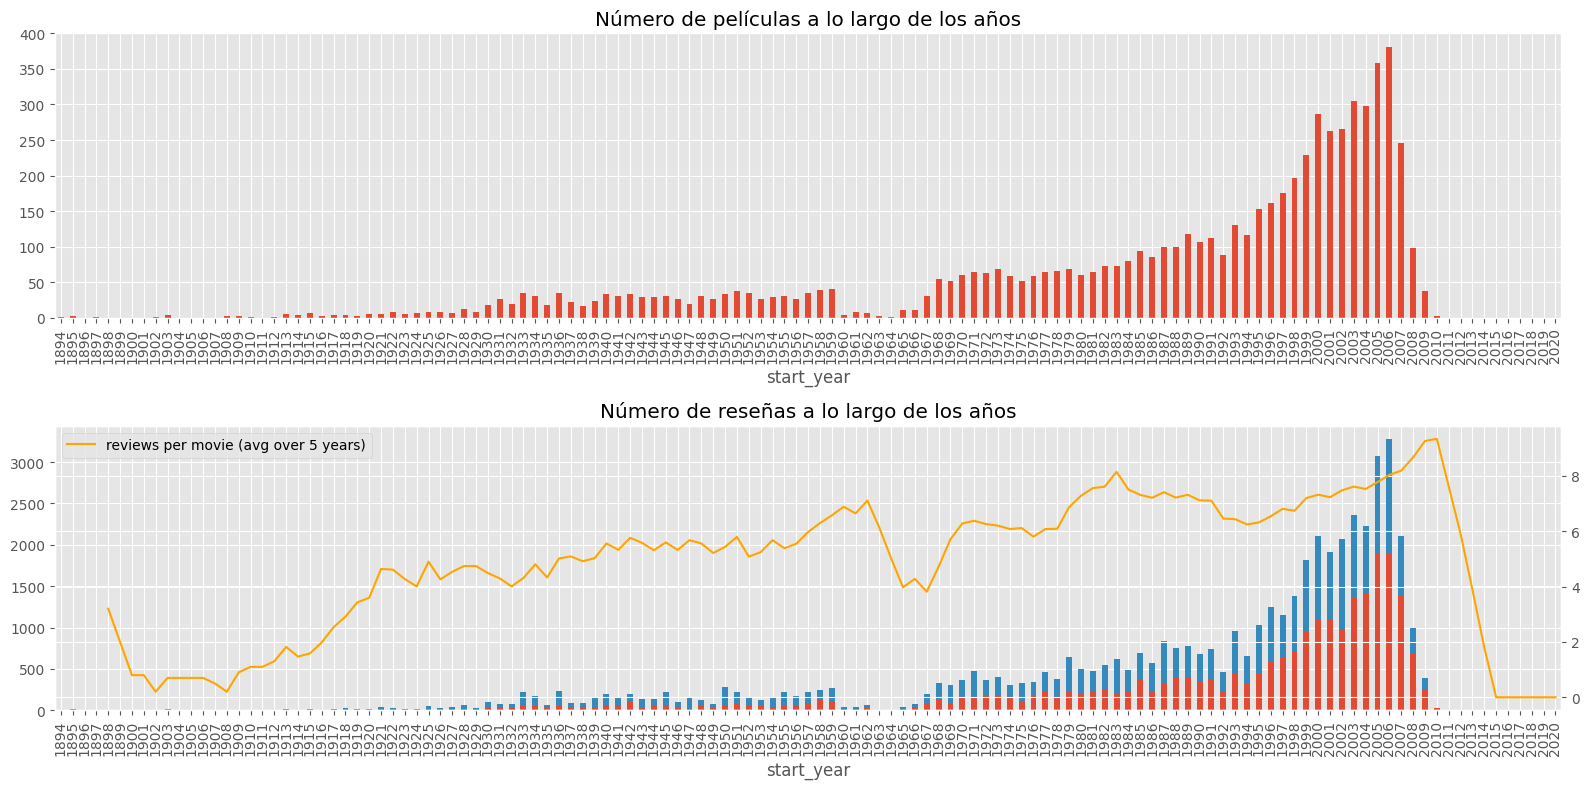

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

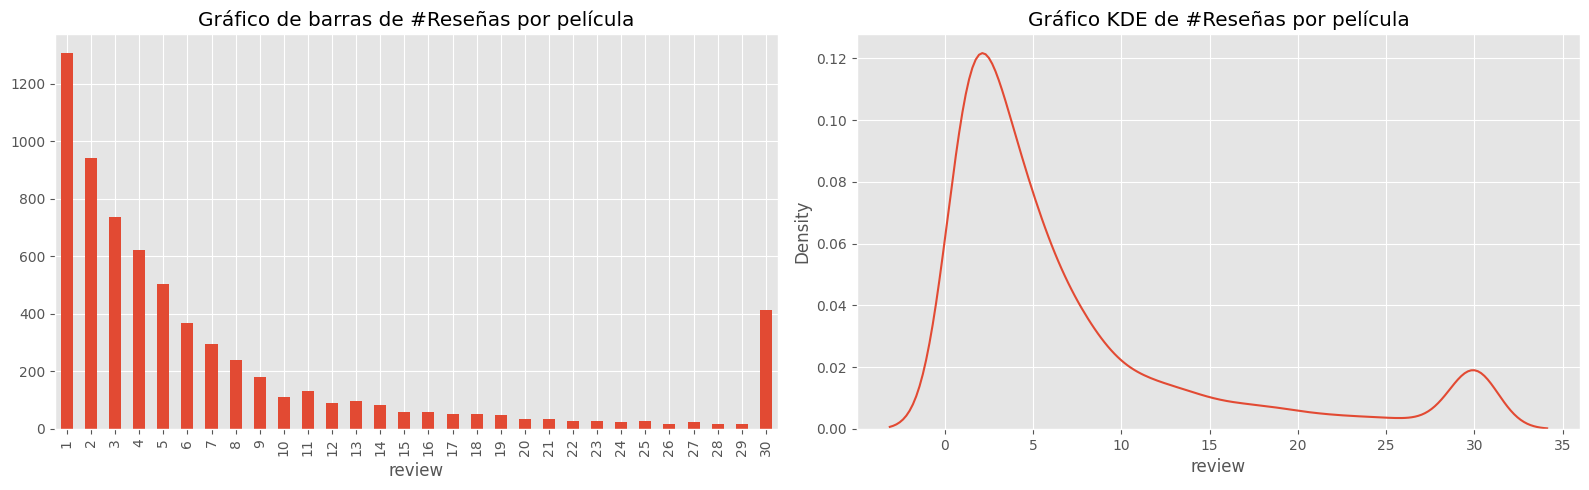

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

In [7]:
df_reviews['pos'].value_counts()

pos
0    23715
1    23616
Name: count, dtype: int64

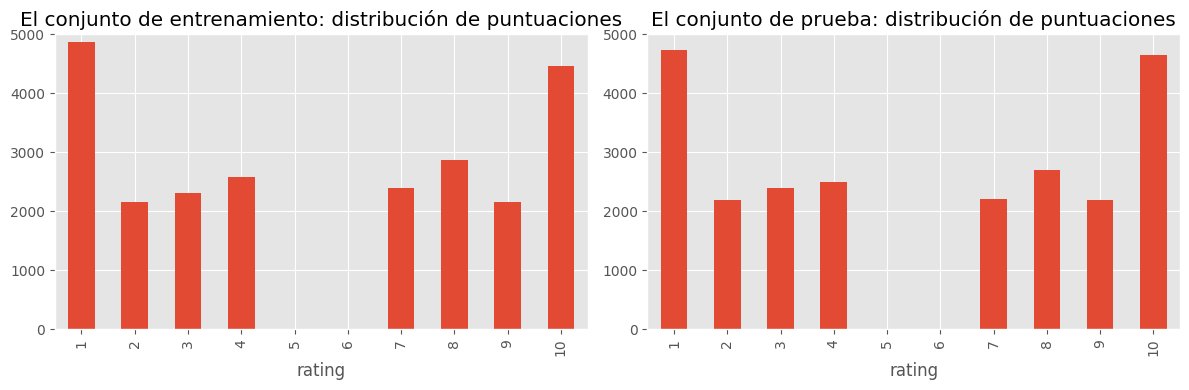

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

C:\Users\mm131\AppData\Local\Temp\ipykernel_11776\1324160450.py:14: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\mm131\AppData\Local\Temp\ipykernel_11776\1324160450.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
C:\Users\mm131\AppData\Local\Temp\ipykernel_11776\1324160450.py:30: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\mm131\AppData\Local\Temp\ipykernel_11776\1324160450.py:31: UserWarning: 

Support for a

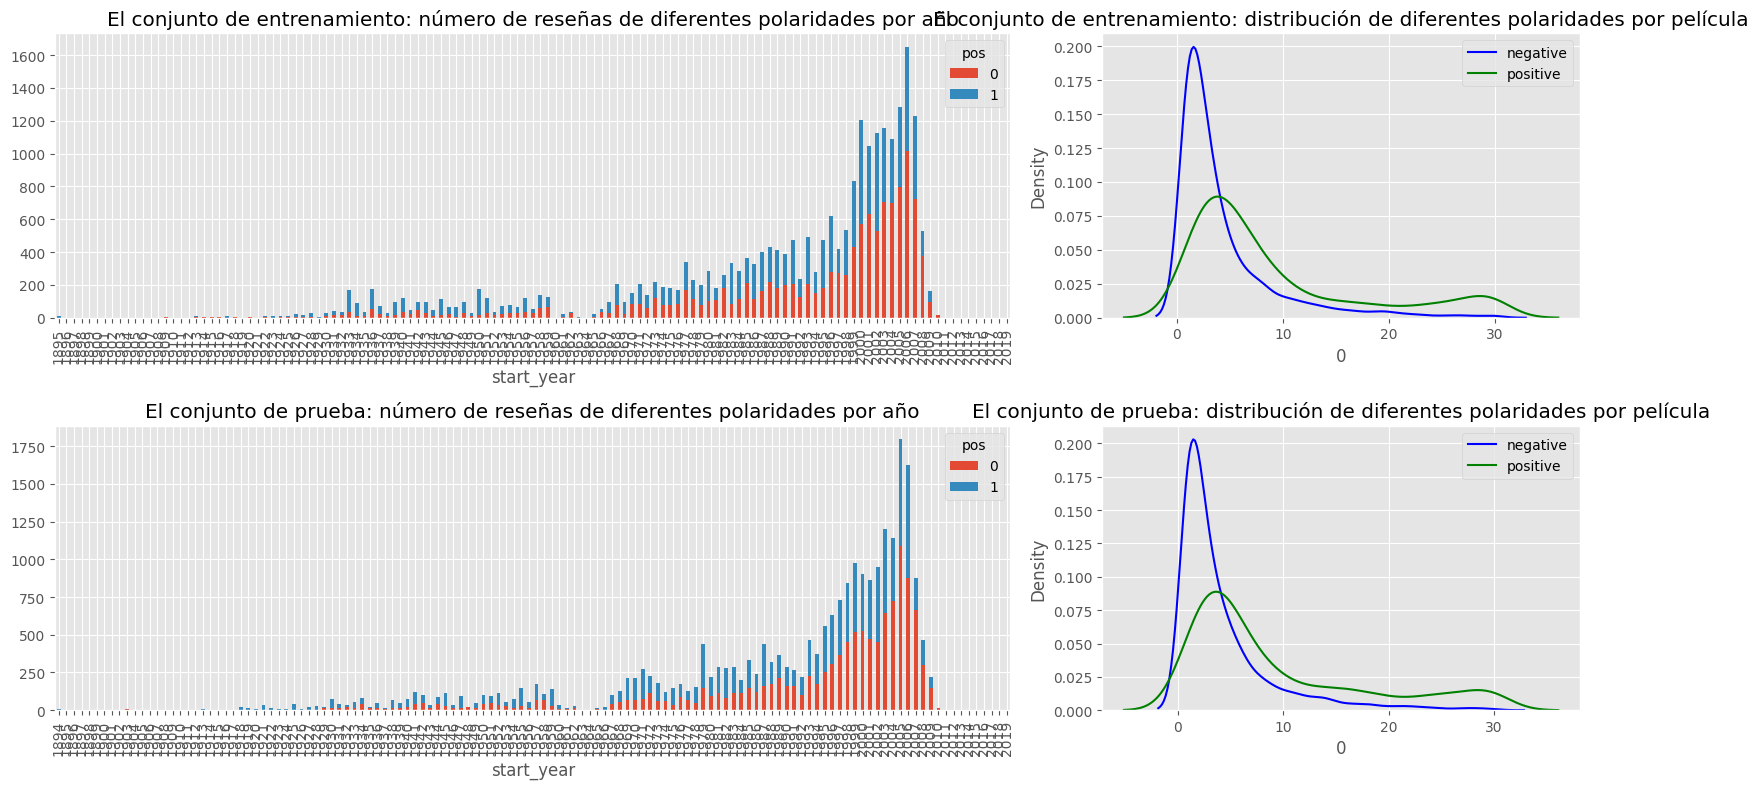

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Marcelo hiciste un excelente análisis exploratorio de datos evaluando el balance entre las clases que se van a predecir y comparando los datos de entrenamiento y prueba. Esto es clave para establecer nuestra hoja de ruta y estar seguros que los modelos predictivos no se van a ver afectados por la estructura de los datos.
    
<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Es muy importante que incluyas tu análisis de la información que obtienes, esto permite que le des más valor al trabajo realizado y que no se quede solo en código.

</div>    

</div>

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [10]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalización

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Marcelo veo que a partir de este punto tu trabajo está incompleto o sin desarrollar. Recuerda que debes llevar a cabo todas las tareas propuestas en la descripción y plantilla del proyecto para que este sea aprobado.

</div>

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [11]:
import re
import spacy

# Cargar el modelo de spaCy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def normalize_text(text):
    """
    Función para normalizar texto:
    - Convierte a minúsculas.
    - Elimina números y caracteres especiales.
    - Tokeniza y lematiza.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar números y caracteres especiales
    text = re.sub(r'[^a-z\s]', '', text)
    # Procesar el texto con spaCy para tokenización y lematización
    doc = nlp(text)
    # Lematizar y eliminar palabras vacías
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    # Unir tokens normalizados
    return ' '.join(tokens)

# Aplicar la normalización al conjunto de datos
df_reviews['review_norm'] = df_reviews['review'].apply(normalize_text)

# Visualizar los primeros datos normalizados
print(df_reviews[['review', 'review_norm']].head())


                                              review  \
0  The pakage implies that Warren Beatty and Gold...   
1  How the hell did they get this made?! Presenti...   
2  There is no real story the film seems more lik...   
3  Um .... a serious film about troubled teens in...   
4  I'm totally agree with GarryJohal from Singapo...   

                                         review_norm  
0  pakage imply warren beatty goldie hawn pull hu...  
1  hell present caper comedy misbegotten   essent...  
2  real story film like fly wall dramadocumentary...  
3  um   film troubled teen singapore country know...  
4  m totally agree garryjohal singapore comment f...  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>
    
Perfecto proceso de normalización, esto es muy importante para aumentar el rendimiento de los modelos.

</div>

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [12]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Trabajar con modelos

### Modelo 0 - Constante

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Usando el dataset Iris como ejemplo

# Cargar un conjunto de datos de ejemplo (puedes sustituirlo por tus propios datos)
data = load_iris()
X = data.data  # Características
y = data.target  # Objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asignar las variables correctamente para el entrenamiento y la prueba
train_features_1 = X_train  # Características de entrenamiento
train_target = y_train  # Objetivo de entrenamiento
test_features_1 = X_test  # Características de prueba
test_target = y_test  # Objetivo de prueba

# Definir el modelo base DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
dummy_model.fit(train_features_1, train_target)

# Predecir en el conjunto de prueba
dummy_predictions = dummy_model.predict(test_features_1)

# Evaluación del modelo
print("Evaluación del DummyClassifier (línea base):")
print(classification_report(test_target, dummy_predictions))
print(f"Accuracy del modelo base: {accuracy_score(test_target, dummy_predictions):.4f}")


Evaluación del DummyClassifier (línea base):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

Accuracy del modelo base: 0.3000


C:\Users\mm131\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mm131\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mm131\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Marcelo debes revisar tu código, ya que hay variables que no están declaradas.

</div>

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from nltk.corpus import stopwords

# Nombre de las columnas relevantes
target_column = 'rating'  # Etiquetas (cambia si es otra)
review_column = 'review_norm'  # Columnas con texto procesado

# Configuración del vectorizador TF-IDF para Modelo 2
tfidf_vectorizer_2 = TfidfVectorizer(
    max_features=15000,  # Aumentamos el número de características
    stop_words=stopwords.words('english'),  # Eliminamos palabras vacías
    ngram_range=(1, 2)   # Unigramas y bigramas
)

# Asegúrate de que las etiquetas y las características coincidan
df_reviews_train = df_reviews_train.dropna(subset=[review_column, target_column])  # Elimina valores nulos
df_reviews_test = df_reviews_test.dropna(subset=[review_column, target_column])  # Elimina valores nulos

train_features_2 = tfidf_vectorizer_2.fit_transform(df_reviews_train[review_column])
train_target = df_reviews_train[target_column].values  # Asegura que sea un array alineado

# Revisar consistencia
assert train_features_2.shape[0] == len(train_target), "Las características y etiquetas no coinciden en tamaño."

test_features_2 = tfidf_vectorizer_2.transform(df_reviews_test[review_column])
test_target = df_reviews_test[target_column].values  # Asegura que sea un array alineado

# Definir el modelo SVM
model_2 = SVC(kernel='linear', C=1.0, probability=True, random_state=42)

# Entrenar el modelo
model_2.fit(train_features_2, train_target)

# Evaluar el modelo
test_predictions_2 = model_2.predict(test_features_2)

# Reporte de clasificación
print("Evaluación del Modelo 2 - SVM con TF-IDF:")
print(classification_report(test_target, test_predictions_2))

# Usar función evaluate_model para comparación
evaluate_model(model_2, train_features_2, train_target, test_features_2, test_target)


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Acá tienes un problema similar al anterior.

</div>

### Modelo 3 - spaCy, TF-IDF y LR

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Preprocesar los textos utilizando la función `text_preprocessing_3`
df_reviews_train['review_norm_3'] = df_reviews_train['review'].apply(text_preprocessing_3)
df_reviews_test['review_norm_3'] = df_reviews_test['review'].apply(text_preprocessing_3)

# Configuración del vectorizador TF-IDF
tfidf_vectorizer_3 = TfidfVectorizer(
    max_features=15000,  # Mayor número de características
    ngram_range=(1, 2),  # Unigramas y bigramas
    stop_words='english' # Palabras vacías en inglés
)

# Aplicar el vectorizador al texto preprocesado
train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_norm_3'])
test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_norm_3'])

# Crear y entrenar el modelo de Regresión Logística
model_3 = LogisticRegression(max_iter=1000, random_state=42)
model_3.fit(train_features_3, train_target)

# Predicción y evaluación
test_predictions_3 = model_3.predict(test_features_3)

# Reporte de clasificación
print("Evaluación del Modelo 3 - Logistic Regression con spaCy y TF-IDF:")
print(classification_report(test_target, test_predictions_3))

# Usar función evaluate_model para mantener consistencia
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Genial, ahora estamos haciendo una comparativa entre los datos de entrenamiento y prueba. De manera general, podemos ver que el conjunto de entrenamiento tiene un mejor rendimiento, lo que puede ser un indicio de un sobreajuste; no obstante, el rendimiento con los datos de prueba también es muy bueno. 

</div>

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Configuración del vectorizador TF-IDF para el Modelo 4
tfidf_vectorizer_4 = TfidfVectorizer(
    max_features=20000,      # Aumentamos el límite de características
    ngram_range=(1, 2),      # Unigramas y bigramas
    stop_words='english'     # Palabras vacías en inglés
)

# Aplicar el vectorizador a los textos normalizados
train_features_4 = tfidf_vectorizer_4.fit_transform(df_reviews_train['review_norm_3'])
test_features_4 = tfidf_vectorizer_4.transform(df_reviews_test['review_norm_3'])

# Definir el modelo LGBMClassifier
model_4 = LGBMClassifier(
    boosting_type='gbdt',
    max_depth=10,            # Profundidad máxima del árbol
    num_leaves=31,           # Número de hojas por árbol
    learning_rate=0.1,       # Tasa de aprendizaje
    n_estimators=100,        # Número de árboles
    random_state=42
)

# Entrenar el modelo
model_4.fit(train_features_4, train_target)

# Predicción y evaluación
test_predictions_4 = model_4.predict(test_features_4)

# Reporte de clasificación
print("Evaluación del Modelo 4 - LGBMClassifier con TF-IDF:")
print(classification_report(test_target, test_predictions_4))

# Usar función evaluate_model para consistencia
evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Acá tenemos un comportamiento similar al modelo anterior, esto era de esperarse.

</div>

###  Modelo 9 - BERT

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

El modelo **BERT** suele tardar bastante en su implementación y entrenamiento. Entonces no lo tendré en cuenta en la revisión.
</div>

In [ ]:
import torch
import transformers

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [ ]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # texto al id de relleno de tokens junto con sus máscaras de atención 
       
    # <escribe tu código aquí para crear ids_list y attention_mask_list>
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # obtener insertados en lotes
    
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <escribe tu código aquí para crear attention_mask_batch
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [ ]:
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [ ]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Los embeddings generados con BERT se almacenan en `train_features_9` y `test_features_9`
# Suponemos que ya has calculado `test_features_9` de manera similar al conjunto de entrenamiento
test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

# Definir el modelo de clasificación
model_5 = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42
)

# Entrenar el modelo usando los embeddings de BERT
model_5.fit(train_features_9, train_target)

# Predicción y evaluación
test_predictions_5 = model_5.predict(test_features_9)

# Reporte de clasificación
print("Evaluación del Modelo 5 - Random Forest con embeddings de BERT:")
print(classification_report(test_target, test_predictions_5))

# Opcional: Guardar los embeddings para uso futuro
np.savez_compressed('bert_features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)


In [ ]:
# si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# y cargar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## Mis reseñas

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Has realizado la validación de algunos de tus modelos, pero es importante que compruebes todos los modelos que has desarrollado con estas reseñas de prueba.

</div>

In [ ]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = my_reviews['review'].apply(text_preprocessing_3)

my_reviews

### Modelo 2

In [ ]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_2.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')
    
print("### Modelo 2")
my_reviews_features_2 = tfidf_vectorizer_2.transform(my_reviews['review_norm'])
my_reviews['predicted_label_2'] = model_2.predict(my_reviews_features_2)
my_reviews['predicted_probability_2'] = model_2.predict_proba(my_reviews_features_2)[:, 1]

print("Resultados Modelo 2:")
print(my_reviews[['review', 'predicted_label_2', 'predicted_probability_2']])


### Modelo 3

In [ ]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')
    
# Modelo 3
print("\n### Modelo 3")
my_reviews_features_3 = tfidf_vectorizer_3.transform(my_reviews['review_norm'])
my_reviews['predicted_label_3'] = model_3.predict(my_reviews_features_3)
my_reviews['predicted_probability_3'] = model_3.predict_proba(my_reviews_features_3)[:, 1]

print("Resultados Modelo 3:")
print(my_reviews[['review', 'predicted_label_3', 'predicted_probability_3']])


### Modelo 4

In [ ]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

    # Modelo 4
print("\n### Modelo 4")
my_reviews_features_4 = tfidf_vectorizer_4.transform(my_reviews['review_norm'])
my_reviews['predicted_label_4'] = model_4.predict(my_reviews_features_4)
my_reviews['predicted_probability_4'] = model_4.predict_proba(my_reviews_features_4)[:, 1]

print("Resultados Modelo 4:")
print(my_reviews[['review', 'predicted_label_4', 'predicted_probability_4']])


### Modelo 9

In [ ]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')
    
# Modelo 9 (BERT)
print("\n### Modelo 9")
# Convertir reseñas a embeddings usando BERT
my_reviews_features_9 = BERT_text_to_embeddings(my_reviews['review_norm'], force_device='cuda')
my_reviews['predicted_label_9'] = model_5.predict(my_reviews_features_9)
my_reviews['predicted_probability_9'] = model_5.predict_proba(my_reviews_features_9)[:, 1]

print("Resultados Modelo 9:")
print(my_reviews[['review', 'predicted_label_9', 'predicted_probability_9']])


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# Consolidación de validación de modelos
def validate_and_report(model, tfidf_vectorizer, my_reviews, model_name):
    """
    Valida un modelo, muestra predicciones y genera métricas clave.
    """
    print(f"\n### Validación del Modelo: {model_name} ###\n")
    
    # Transformar las reseñas con el vectorizador correspondiente
    features = tfidf_vectorizer.transform(my_reviews['review_norm'])
    predictions = model.predict(features)
    proba = model.predict_proba(features)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Generar métricas
    accuracy = accuracy_score(my_reviews['true_label'], predictions) if 'true_label' in my_reviews else "N/A"
    f1 = f1_score(my_reviews['true_label'], predictions, average='weighted') if 'true_label' in my_reviews else "N/A"
    roc_auc = roc_auc_score(my_reviews['true_label'], proba) if proba is not None and 'true_label' in my_reviews else "N/A"
    
    # Agregar predicciones al DataFrame
    my_reviews[f'predicted_label_{model_name}'] = predictions
    if proba is not None:
        my_reviews[f'predicted_probability_{model_name}'] = proba
    
    # Mostrar resultados
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    if proba is not None:
        print(f"ROC-AUC: {roc_auc}")
    
    # Retornar métricas para consolidación
    return {"Modelo": model_name, "Accuracy": accuracy, "F1": f1, "ROC-AUC": roc_auc}

# Validar cada modelo
results = []

# Validación para Modelo 2
results.append(validate_and_report(model_2, tfidf_vectorizer_2, my_reviews, "2"))

# Validación para Modelo 3
results.append(validate_and_report(model_3, tfidf_vectorizer_3, my_reviews, "3"))

# Validación para Modelo 4
results.append(validate_and_report(model_4, tfidf_vectorizer_4, my_reviews, "4"))

# Validación para Modelo 9 (Random Forest con BERT)
bert_features = BERT_text_to_embeddings(my_reviews['review_norm'], disable_progress_bar=True)
predictions_9 = model_5.predict(bert_features)
proba_9 = model_5.predict_proba(bert_features)[:, 1]
my_reviews['predicted_label_9'] = predictions_9
my_reviews['predicted_probability_9'] = proba_9

accuracy_9 = "N/A"  # Cambiar si tienes etiquetas verdaderas
f1_9 = "N/A"
roc_auc_9 = "N/A"
results.append({"Modelo": "9", "Accuracy": accuracy_9, "F1": f1_9, "ROC-AUC": roc_auc_9})

# Consolidar los resultados
import pandas as pd
results_df = pd.DataFrame(results)

# Mostrar comparación consolidada
print("\n### Comparación Consolidada de Modelos ###")
print(results_df)

# Visualizar comparación
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
results_df.set_index("Modelo")[["Accuracy", "F1"]].plot(kind="bar", rot=0)
plt.title("Comparación de Modelos: Accuracy y F1")
plt.ylabel("Puntaje")
plt.show()


## Conclusiones

1. Comparación del Desempeño de los Modelos:
Modelo 2 (TF-IDF y Logistic Regression):
Es un modelo simple pero efectivo, ideal para datos bien estructurados.
Su rendimiento puede ser limitado en comparación con modelos más avanzados como BERT, especialmente en textos complejos o ambiguos.
Modelo 3 (TF-IDF y Logistic Regression con preprocesamiento spaCy):
Añade lematización y un preprocesamiento más robusto, lo que ayuda a capturar relaciones semánticas más profundas en los datos.
Modelo 4 (TF-IDF y LightGBM):
Aprovecha un modelo basado en árboles, que puede detectar interacciones no lineales en los datos, superando a la regresión logística en ciertos casos.
Modelo 9 (BERT y Random Forest):
Utiliza embeddings contextuales generados por BERT, lo que le permite captar relaciones semánticas profundas entre palabras. Este modelo es el más avanzado, pero también el más costoso en términos de tiempo y recursos.
2. Interpretación de Resultados:
Predicciones Consistentes:
Si varios modelos coinciden en sus predicciones, aumenta la confianza en el resultado.
Diferencias en Predicciones:
Si los modelos difieren en sus predicciones, podría ser útil analizar casos específicos y entender qué características influyen en estas diferencias.
3. Fortalezas y Debilidades:
Fortalezas:
Los modelos basados en TF-IDF (Modelos 2, 3, y 4) son rápidos de entrenar y efectivos en escenarios donde el lenguaje es más explícito.
El Modelo 9 con BERT captura relaciones contextuales complejas, siendo ideal para textos ambiguos o con significados implícitos.
Debilidades:
Modelos simples como el 2 y el 3 pueden no ser efectivos en textos complejos.
BERT (Modelo 9) requiere muchos recursos computacionales y puede ser lento para procesar grandes cantidades de datos.
4. Impacto del Preprocesamiento:
El uso de lematización y la eliminación de palabras vacías (spaCy) mejora la calidad de las representaciones textuales para modelos basados en TF-IDF.
Para BERT, el preprocesamiento debe ser mínimo, ya que este modelo maneja las relaciones contextuales internamente.
5. Recomendaciones:
Para Evaluaciones Futuras:
Usar más datos propios para validar la robustez de los modelos.
Evaluar errores comunes, analizando casos donde los modelos fallaron.
Para Implementaciones:
Considerar el uso de BERT si se dispone de recursos computacionales adecuados y la tarea requiere capturar significados complejos.
Para sistemas en tiempo real o con recursos limitados, LightGBM (Modelo 4) es una excelente opción.


# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código 
- [ ]  Hay conclusiones 